In [110]:
!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


# Pré - Processamento de dados - ETL

In [111]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

csv_path = "/home/tks/ia/A3/src/dados/formatado/CAR-DETAILS formatado.CSV"

# Carregar o conjunto de dados
data = pd.read_csv(csv_path, sep=";")
data = data.drop_duplicates()

# Exibir as primeiras linhas do conjunto de dados
data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
3,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
4,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner


## Tipo de data

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 1884
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1592 non-null   object
 1   year           1592 non-null   int64 
 2   selling_price  1592 non-null   int64 
 3   km_driven      1592 non-null   int64 
 4   fuel           1592 non-null   object
 5   seller_type    1592 non-null   object
 6   transmission   1592 non-null   object
 7   owner          1592 non-null   object
dtypes: int64(3), object(5)
memory usage: 111.9+ KB


In [113]:
data.describe()

,year,selling_price,km_driven
count,1592.000000,1592.000000,1592.000000
mean,2010.189070,182574.269472,79717.741834
std,4.097806,76089.722861,47362.860239
min,1992.000000,20000.000000,1.000000
25%,2008.000000,120000.000000,50000.000000
50%,2010.000000,180000.000000,70000.000000
75%,2013.000000,250000.000000,100000.000000
max,2020.000000,300000.000000,806599.000000


In [114]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

# Feature engineering - Separar marca do carro


In [115]:
#Splitting company name from CarName column

if "company" not in data.columns:
    company = data['name'].apply(lambda x : x.split(' ')[0])
    data.insert(3,"company",company)

# Loop para remover a marca da coluna 'name'
for index, row in data.iterrows():
    data.at[index, 'name'] = row['name'].replace(row['company'], '')

data.head()


,name,year,selling_price,company,km_driven,fuel,seller_type,transmission,owner
0,800 AC,2007,60000,Maruti,70000,Petrol,Individual,Manual,First Owner
1,Wagon R LXI Minor,2007,135000,Maruti,50000,Petrol,Individual,Manual,First Owner
2,RediGO T Option,2017,250000,Datsun,46000,Petrol,Individual,Manual,First Owner
3,Alto LX BSIII,2007,140000,Maruti,125000,Petrol,Individual,Manual,First Owner
4,Indigo Grand Petrol,2014,240000,Tata,60000,Petrol,Individual,Manual,Second Owner


In [116]:
for column in data.columns:
    print(data[column].unique())

[' 800 AC' ' Wagon R LXI Minor' ' RediGO T Option' ' Alto LX BSIII'
 ' Indigo Grand Petrol' ' Sail 1.2 Base' ' i10 Magna 1.1L'
 ' Wagon R VXI BS IV with ABS' ' Wagon R VXI BS IV' ' Santro Xing GLS'
 ' Alto LXi' ' Jeep CL 500 MDI' ' Indica DLS' ' EON Magna Plus'
 ' Tavera Neo LS B3 - 7(C) seats BSIII' ' Indigo Classic Dicor'
 ' Indica Vista Quadrajet LS' ' Swift 1.3 VXi' ' Civic 1.8 V AT'
 ' i10 Sportz 1.2' ' Getz GLS' ' Santro Xing XO' ' RediGO 1.0 S'
 ' SX4 Zxi BSIII' ' SX4 ZXI MT BSIV' ' SX4 Vxi BSIII' ' Beat Diesel'
 ' Zen LX' ' Swift Vdi BSIII' ' Nano Lx BSIV' ' Indica Vista Aqua 1.4 TDI'
 ' i10 Sportz 1.1L' ' 800 Std' ' Spark 1.0 LS' ' EON Era Plus'
 ' Indica Vista Aqua TDI BSIII' ' Santro LP zipPlus' ' Bolt Quadrajet XE'
 ' 800 AC BSIII' ' Santro LE' ' Santro Xing XL eRLX Euro III'
 ' Getz 1.3 GLS' ' Quanto C8' ' KWID RXT' ' Wagon R DUO LPG'
 ' Wagon R LXI' ' Enjoy 1.3 TCDi LS 8' ' Brio E MT' ' Indigo CR4'
 ' Beat LT' ' Santro Xing XG' ' Alto K10 LXI CNG' ' 800 Std BSII'
 ' Nano 

# Análise exploratória


Dados numéricos

-Distribuição de precos
    - boxpolot preco
- Distribuição de anos
    - boxpolot anos
- Distribuição de km rodados
    - boxpolot km rodado

Dados categóricos

- checar popularidade de marca
- popularidade de transmissão
- popularidade do tipo de combustível
- popularidade da quantidade de donos

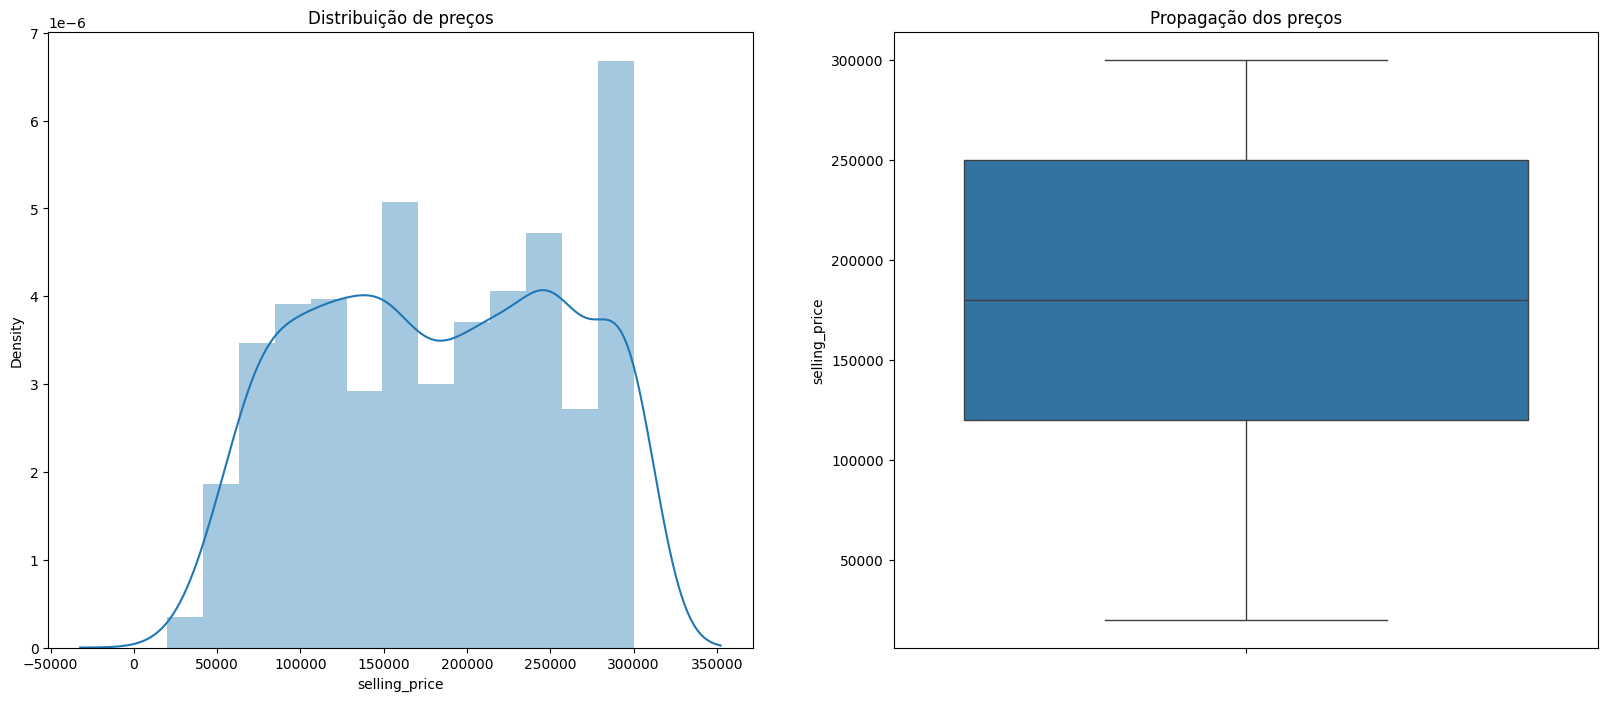

In [117]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de preços')
sns.distplot(data['selling_price'])

plt.subplot(1,2,2)
plt.title('Propagação dos preços')
sns.boxplot(y=data['selling_price'])


plt.show()

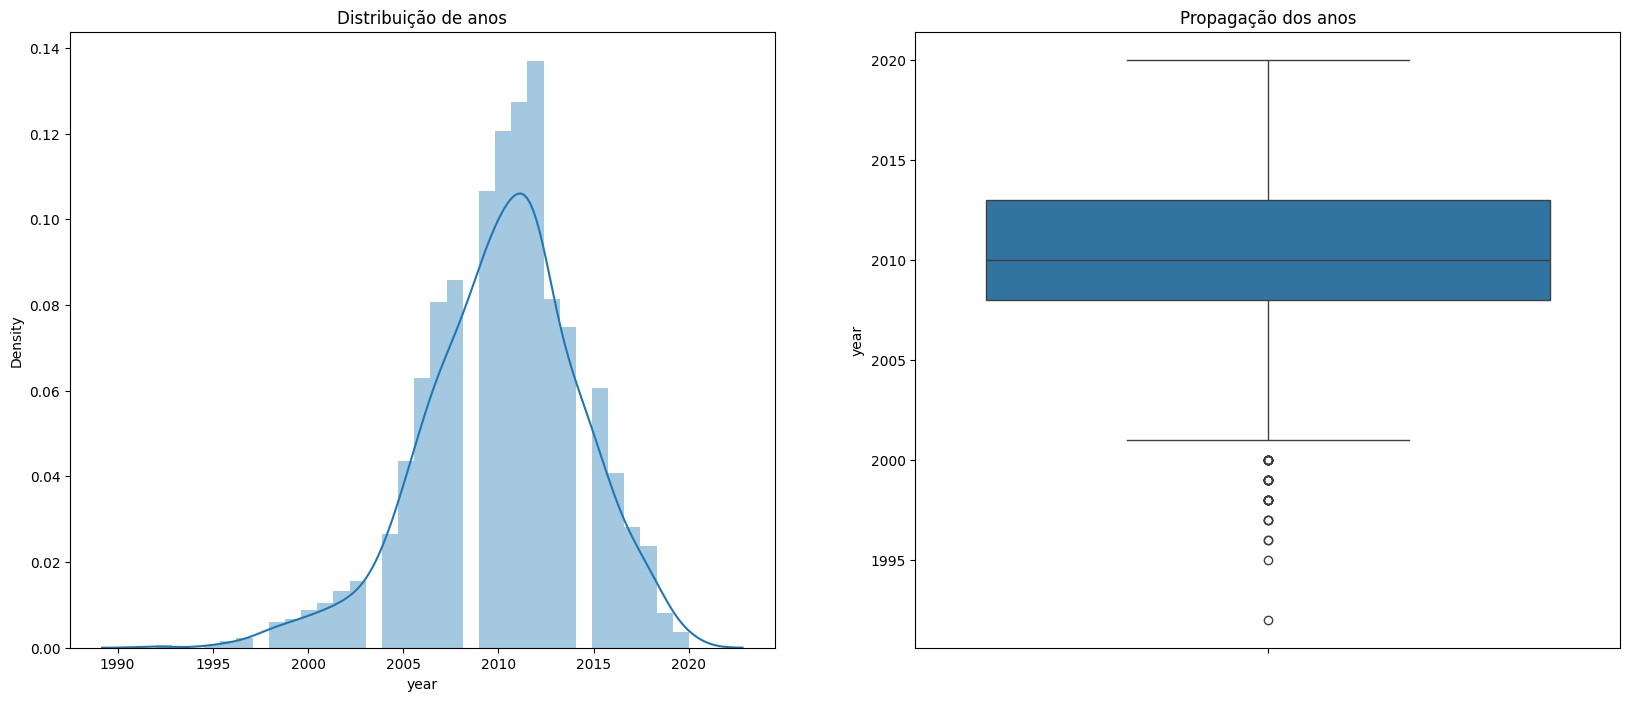

In [118]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de anos')
sns.distplot(data['year'])

plt.subplot(1,2,2)
plt.title('Propagação dos anos')
sns.boxplot(y=data['year'])


plt.show()

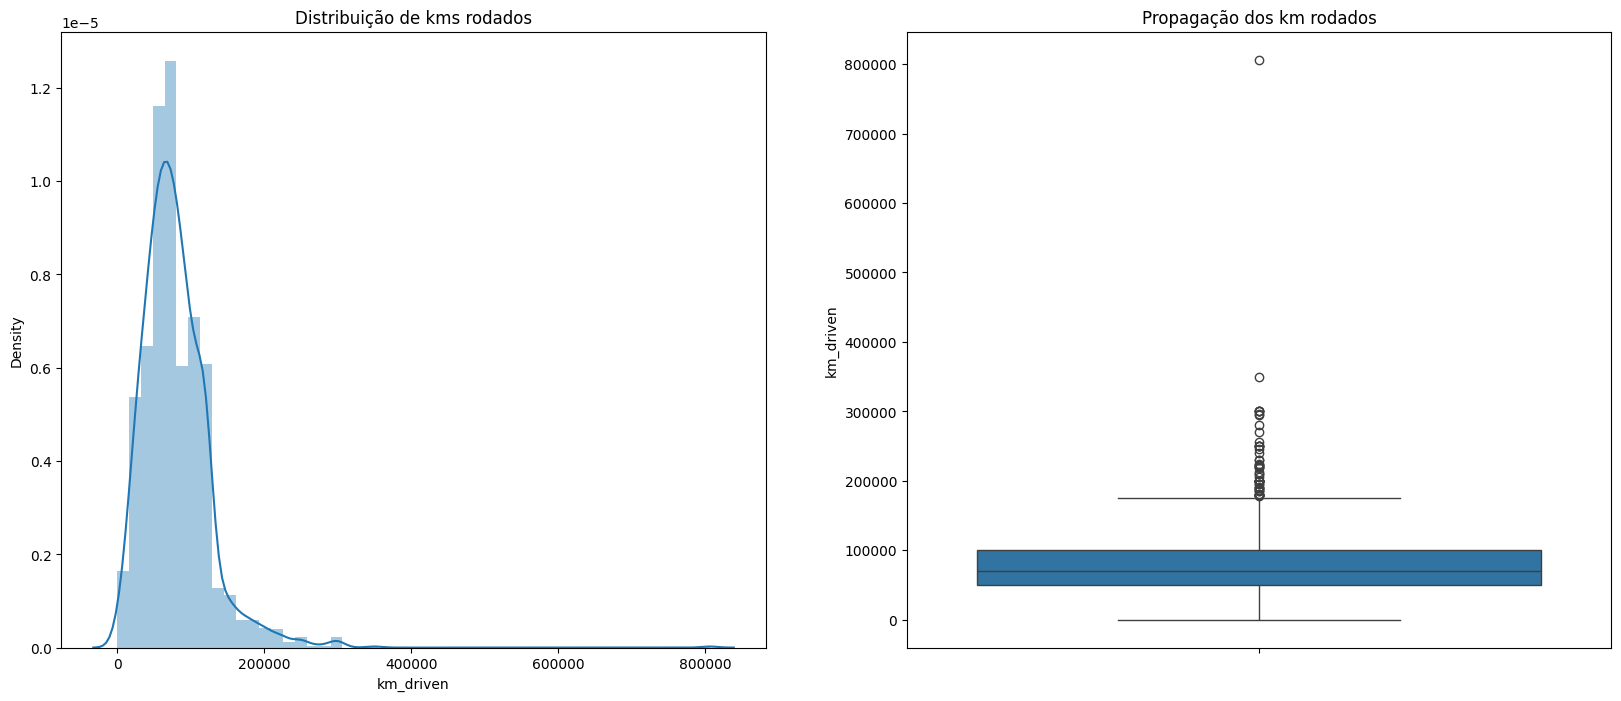

In [119]:
import seaborn as sns
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribuição de kms rodados')
sns.distplot(data['km_driven'])

plt.subplot(1,2,2)
plt.title('Propagação dos km rodados')
sns.boxplot(y=data['km_driven'])


plt.show()

Perfil de carro que mais sai: carros de 2010 a 2016, com menos de 100k km rodados, com preços não maiores que 1.3M

# Convertendo dados categóricos com LabelEcoder

In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(data['name'])
data['name'] = le.transform(data['name'])

le.fit(data['company'])
data['company'] = le.transform(data['company'])

le.fit(data['fuel'])
data['fuel'] = le.transform(data['fuel'])

le.fit(data['seller_type'])
data['seller_type'] = le.transform(data['seller_type'])

le.fit(data['transmission'])
data['transmission'] = le.transform(data['transmission'])

le.fit(data['owner'])
data['owner'] = le.transform(data['owner'])

# Separar as características (features) e o alvo (target)

In [121]:
# Separar as características (features) e o alvo (target)
X = data.drop(['selling_price'], axis=1)  # Características
y = data['selling_price']  # Alvo

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um modelo de regressão linear
model = LinearRegression()
# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
predictions = model.predict(X_test)
r2 = model.score(X,y)
print(f"r2 {r2}")
print(f"Intercepto: {model.intercept_}")


r2 0.4705210409598919
Intercepto: -22900654.20098458


In [122]:
# Os coeficientes representam os pesos
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['coefficient'])
coefficients

,coefficient
name,63.987342
year,11532.606336
company,-1426.158636
km_driven,-0.006731
fuel,-14054.364138
seller_type,-23085.377466
transmission,-51549.044509
owner,-1933.959797


# Avaliar o desempenho do modelo

In [133]:
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score 
r2 = r2_score(y_test,predictions)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"r2 {r2}")
print(f"Erro quadrático médio: {mse}")
print(f"Erro médio absoluto {mae}")
print(f"Erro médio percentual absoluto {mape}")

r2 0.5154783237269438
Erro quadrático médio: 2889821266.9075503
Erro médio absoluto 43205.16537427379
Erro médio percentual absoluto 0.3075344657082509


# Visualizar as previsões em comparação com os valores reais

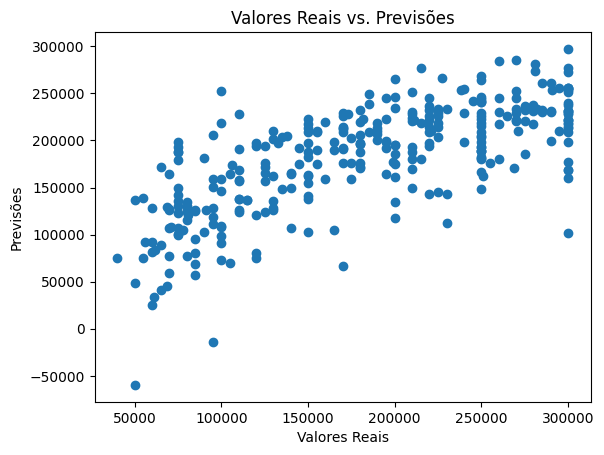

In [124]:
plt.scatter(y_test, predictions)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Valores Reais vs. Previsões")
plt.show()

# Sumário do modelo 

In [128]:
import statsmodels.api as sm 
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
print(build_model(X_train,y_train))

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.23e-162
Time:                        20:34:33   Log-Likelihood:                -15718.
No. Observations:                1273   AIC:                         3.145e+04
Df Residuals:                    1264   BIC:                         3.150e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -2.29e+07    8.5e+05    -26.938   

In [130]:
lm = sm.OLS(y_train,X_train).fit()
y_train_price = lm.predict(X_train)

Text(0.5, 0, 'Errors')

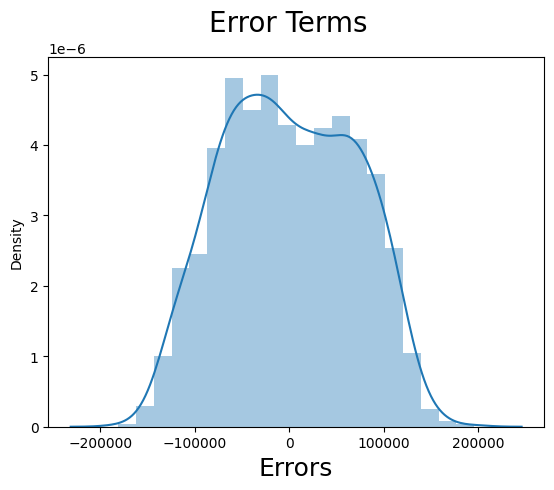

In [131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  